In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL0xlbm92by9EZXNrdG9wL3BmamF4L2RvY3M='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/importlib/_bootstrap_external.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/zipimport.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/codecs.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/aliases.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/__init__.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/encodings/utf_8.py": 1733248792.0, "/opt/homebrew/Cellar/python@3.13/3.13.1/Frameworks/Python.

In [2]:
# jax
import jax
import jax.numpy as jnp
import jax.scipy as jsp
import jax.random
from functools import partial
# plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import projplot as pjp
# pfjax
import pfjax as pf
from pfjax.models import BMModel

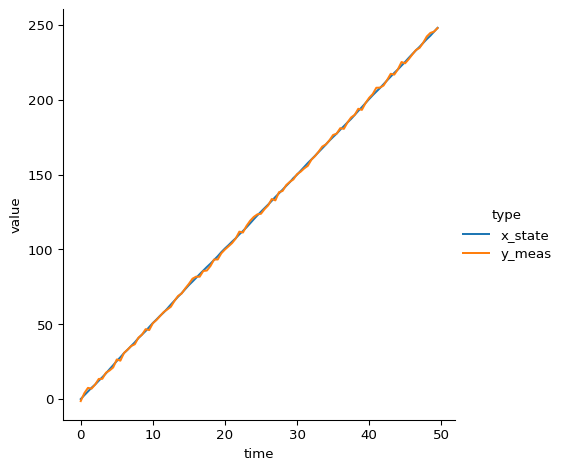

In [3]:
# parameter values
# mu, sigma, tau = .1, .2, .1
mu, sigma, tau = 5., .2, 1.
theta_true = jnp.array([mu, sigma, tau])

# data specification
dt = .5
n_obs = 100
x_init = jnp.array(0.)

# initial key for random numbers
key = jax.random.PRNGKey(0)

# simulate data
bm_model = BMModel(dt=dt)
key, subkey = jax.random.split(key)
y_meas, x_state = pf.simulate(
    model=bm_model,
    key=subkey,
    n_obs=n_obs,
    x_init=x_init,
    theta=theta_true
)

# plot data
plot_df = (pd.DataFrame({"time": jnp.arange(n_obs) * dt,
                         "x_state": jnp.squeeze(x_state),
                         "y_meas": jnp.squeeze(y_meas)})
           .melt(id_vars="time", var_name="type"))
sns.relplot(
    data=plot_df, kind="line",
    x="time", y="value", hue="type"
)

In [4]:
def bm_loglik_exact(theta, y_meas):
    """
    Exact loglikelihood of the BM model.
    """
    theta = jnp.atleast_2d(theta)
    ll = jax.vmap(lambda _theta: bm_model.loglik_exact(
        y_meas=y_meas, 
        theta=_theta
    ))(theta)
    return jnp.squeeze(ll)

def bm_loglik_basic(theta, y_meas, key, n_particles):
    """
    Basic particle filter approximation of the loglikelihood.
    """
    theta = jnp.atleast_2d(theta)
    subkeys = jax.random.split(key, num=theta.shape[0])
    ll = jax.vmap(lambda _theta, _key: pf.particle_filter(
        model=bm_model,
        key=_key,
        y_meas=y_meas,
        n_particles=n_particles,
        theta=_theta,
        history=False,
        score=False,
        fisher=False
    )["loglik"])(theta, subkeys)
    return jnp.squeeze(ll)

def bm_loglik_rb(theta, y_meas, key, n_particles):
    """
    RB particle filter approximation of the loglikelihood.
    """
    theta = jnp.atleast_2d(theta)
    subkeys = jax.random.split(key, num=theta.shape[0])
    ll = jax.vmap(lambda _theta, _key: pf.particle_filter_rb(
        model=bm_model,
        key=_key,
        y_meas=y_meas,
        n_particles=n_particles,
        theta=_theta,
        history=False,
        score=False,
        fisher=False
    )["loglik"])(theta, subkeys)
    return jnp.squeeze(ll)

def bm_loglik_ott(theta, y_meas, key, n_particles):
    """
    Optimal transport particle filter approximation of the loglikelihood.
    """
    theta = jnp.atleast_2d(theta)
    subkeys = jax.random.split(key, num=theta.shape[0])
    ll = jax.vmap(lambda _theta, _key: pf.particle_filter(
        model=bm_model,
        key=_key,
        y_meas=y_meas,
        n_particles=n_particles,
        theta=_theta,
        history=False,
        score=False,
        fisher=False,
    )["loglik"])(theta, subkeys)
    return jnp.squeeze(ll)

In [5]:
# jit-compiled exact loglikelihood (timed for reference)
bm_ll_exact = jax.jit(partial(bm_loglik_exact, y_meas=y_meas))

%timeit bm_ll_exact(theta_true)

# jit-compiled basic particle filter
n_particles_basic = 2500
key, subkey = jax.random.split(key)
bm_ll_basic = jax.jit(partial(bm_loglik_basic, y_meas=y_meas,
                             n_particles=n_particles_basic, key=subkey))

%timeit bm_ll_basic(theta_true)

# jit-compiled RB particle filter
n_particles_rb = 400
key, subkey = jax.random.split(key)
bm_ll_rb = jax.jit(partial(bm_loglik_rb, y_meas=y_meas,
                             n_particles=n_particles_rb, key=subkey))

%timeit bm_ll_rb(theta_true)

40.8 μs ± 176 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


The slowest run took 4.21 times longer than the fastest. This could mean that an intermediate result is being cached.
31.8 μs ± 23.1 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


31.5 μs ± 20.5 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
# projection plot specification
n_pts = 100 # number of evaluation points per plot
# theta_lims = jnp.array([[-.5, .5], [.1, .4], [.05, .2]])  # plot limits for each parameter
theta_lims = jnp.array([[4.5, 5.5], [.01, .4], [.5, 2]])  # plot limits for each parameter
theta_names = ["mu", "sigma", "tau"] # parameter names

# projection plots for exact loglikelihood
df_exact = pjp.proj_plot(
    fun=bm_ll_exact,
    x_opt=theta_true, 
    x_lims=theta_lims, 
    x_names=theta_names, 
    n_pts=n_pts,
    vectorized=True,
    plot=False
)

# projection plots for basic particle filter
df_basic = pjp.proj_plot(
    fun=bm_ll_basic,
    x_opt=theta_true, 
    x_lims=theta_lims, 
    x_names=theta_names, 
    n_pts=n_pts,
    vectorized=True,
    plot=False
)

# projection plots for RB particle filter
df_rb = pjp.proj_plot(
    fun=bm_ll_rb,
    x_opt=theta_true, 
    x_lims=theta_lims, 
    x_names=theta_names, 
    n_pts=n_pts,
    vectorized=True,
    plot=False
)

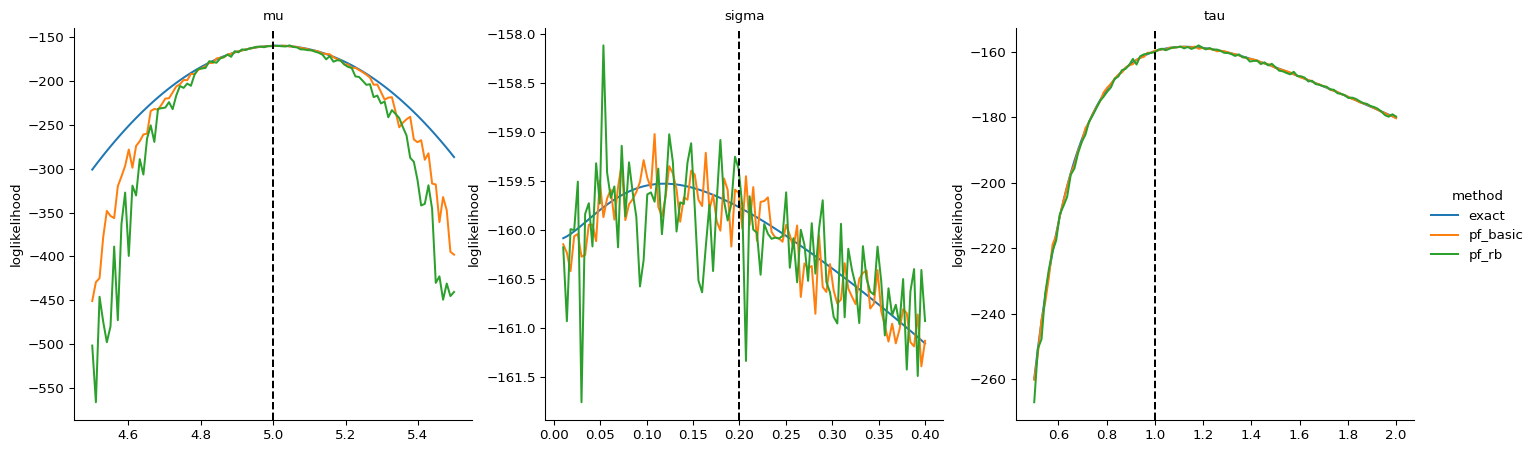

In [7]:
#merge data frames and plot them
plot_df = pd.concat([df_exact, df_basic, df_rb], ignore_index=True)
plot_df["method"] = np.repeat(["exact", "pf_basic", "pf_rb"], len(df_exact["variable"]))
rp = sns.relplot(
    data=plot_df, kind="line",
    x="x", y="y", 
    hue="method",
    col="variable",
    col_wrap = 3,
    facet_kws=dict(sharex=False, sharey=False)
)
rp.set_titles(col_template="{col_name}")
rp.set(xlabel=None)
rp.set(ylabel="loglikelihood")
# add true parameter values
for ax, theta in zip(rp.axes.flat, theta_true):
    ax.axvline(theta, linestyle="--", color="black")

In [8]:
# exact score function
bm_score_exact = jax.jit(jax.grad(partial(bm_loglik_exact, y_meas=y_meas)))


# auto score function
@partial(jax.jit, static_argnums=(2,))
def bm_score_auto(theta, key, n_particles):
    return jax.grad(bm_loglik_basic)(theta, y_meas, key, n_particles)


# acc score function
@partial(jax.jit, static_argnums=(2,))
def bm_score_acc(theta, key, n_particles):
    out = pf.particle_filter(
        model=bm_model,
        key=key,
        y_meas=y_meas,
        theta=theta,
        n_particles=n_particles,
        score=True,
        fisher=False,
        history=False
    )
    return out["score"]


# rb score function
@partial(jax.jit, static_argnums=(2,))
def bm_score_rb(theta, key, n_particles):
    out = pf.particle_filter_rb(
        model=bm_model,
        key=key,
        y_meas=y_meas,
        theta=theta,
        n_particles=n_particles,
        score=True,
        fisher=False,
        history=False
    )
    return out["score"]

In [9]:
key = jax.random.PRNGKey(0)
n_particles_basic = 2500
n_particles_rb = 100

# check timings
%timeit bm_score_exact(theta_true)
%timeit bm_score_auto(theta_true, key, n_particles_basic)
%timeit bm_score_acc(theta_true, key, n_particles_basic)
%timeit bm_score_rb(theta_true, key, n_particles_rb)

15.6 μs ± 7.64 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The slowest run took 5.38 times longer than the fastest. This could mean that an intermediate result is being cached.
59.4 μs ± 36.3 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The slowest run took 4.90 times longer than the fastest. This could mean that an intermediate result is being cached.
32.7 μs ± 21.3 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The slowest run took 4.65 times longer than the fastest. This could mean that an intermediate result is being cached.
29 μs ± 22 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
# repeat calculation nsim times
n_sim = 100
key, *subkeys = jax.random.split(key, n_sim+1)

score_exact = bm_score_exact(theta_true)
score_auto = []
score_acc = []
score_rb = []

for i in range(n_sim):
    score_auto += [bm_score_auto(theta_true, subkeys[i], n_particles_basic)]
    score_acc += [bm_score_acc(theta_true, subkeys[i], n_particles_basic)]
    score_rb += [bm_score_rb(theta_true, subkeys[i], n_particles_rb)]

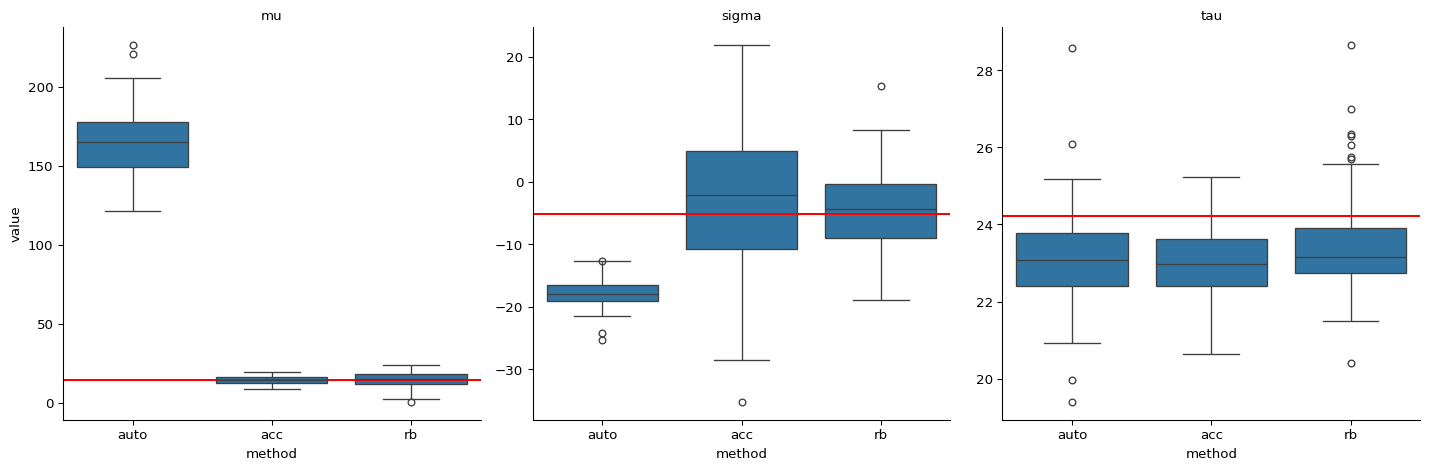

In [11]:
plot_df = (
    pd.DataFrame({
    "theta": np.tile(theta_names, n_sim),
    "auto": np.array(score_auto).ravel(),
    "acc": np.array(score_acc).ravel(),
    "rb": np.array(score_rb).ravel()
})
    .melt(id_vars=["theta"], value_vars=["auto", "acc", "rb"], var_name="method")
)

g = sns.catplot(
    data=plot_df, kind="box",
    x="method", y="value",
    col="theta",
    col_wrap=3,
    sharey=False
)
g.set_titles(col_template="{col_name}")
[g.axes[i].axhline(score_exact[i], color="red") for i in range(theta_true.size)];

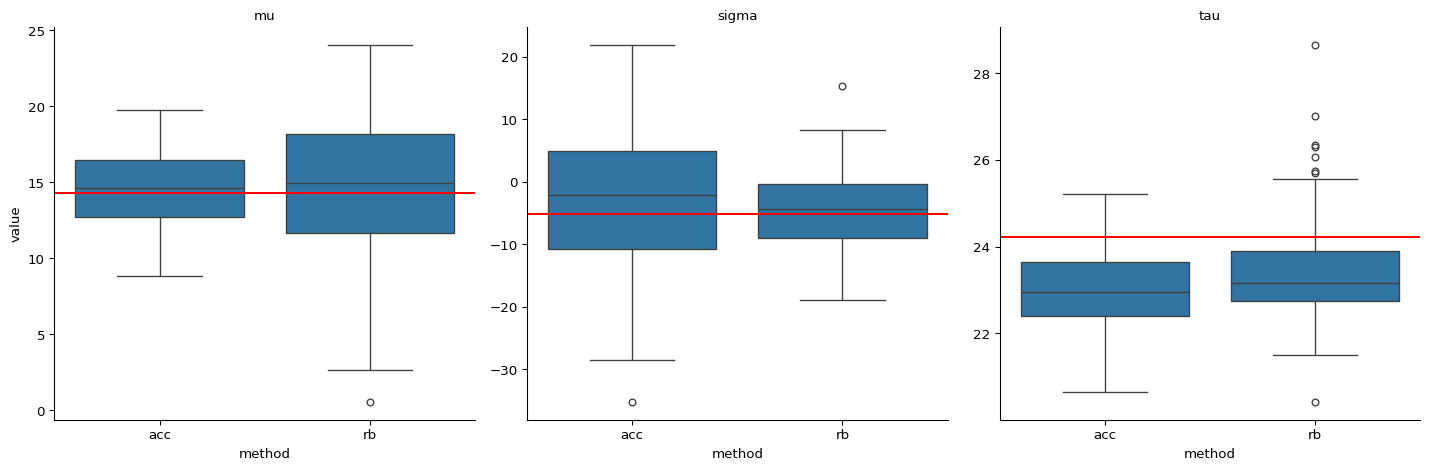

In [12]:
# same thing without auto
g = sns.catplot(
    data=plot_df[plot_df["method"] != "auto"], kind="box",
    x="method", y="value",
    col="theta",
    col_wrap=3,
    sharey=False
)
g.set_titles(col_template="{col_name}")
[g.axes[i].axhline(score_exact[i], color = "red") for i in range(theta_true.size)];

In [13]:
# exact fisher information
@jax.jit
def bm_fisher_exact(theta):
    hess = jax.jacfwd(jax.jacrev(partial(bm_loglik_exact, y_meas=y_meas)))(theta)
    return -hess


# auto fisher information
@partial(jax.jit, static_argnums=(2,))
def bm_fisher_auto(theta, key, n_particles):
    hess = jax.jacfwd(jax.jacrev(bm_loglik_basic))(theta, y_meas, key, n_particles)
    return -hess


# acc fisher information
@partial(jax.jit, static_argnums=(2,))
def bm_fisher_acc(theta, key, n_particles):
    out = pf.particle_filter(
        model=bm_model,
        key=key,
        y_meas=y_meas,
        theta=theta,
        n_particles=n_particles,
        score=True,
        fisher=True,
        history=False
    )
    return out["fisher"]


# rb fisher information
@partial(jax.jit, static_argnums=(2,))
def bm_fisher_rb(theta, key, n_particles):
    out = pf.particle_filter_rb(
        model=bm_model,
        key=key,
        y_meas=y_meas,
        theta=theta,
        n_particles=n_particles,
        score=True,
        fisher=True,
        history=False
    )
    return out["fisher"]

In [14]:
key = jax.random.PRNGKey(0)
n_particles_basic = 2500
n_particles_rb = 100

# compare timings
%timeit bm_fisher_exact(theta_true)
%timeit bm_fisher_auto(theta_true, key, n_particles_basic)
%timeit bm_fisher_acc(theta_true, key, n_particles_basic)
%timeit bm_fisher_rb(theta_true, key, n_particles_rb)

17.9 μs ± 8.13 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


69.5 μs ± 35.2 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


The slowest run took 5.44 times longer than the fastest. This could mean that an intermediate result is being cached.
29.2 μs ± 25 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


33.6 μs ± 14.3 μs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
n_sim = 100
key, *subkeys = jax.random.split(key, n_sim+1)

# repeat calculation nsim times
fisher_exact = bm_fisher_exact(theta_true)
fisher_auto = []
fisher_acc = []
fisher_rb = []

for i in range(n_sim):
    fisher_auto += [bm_fisher_auto(theta_true, subkeys[i], n_particles_basic)]
    fisher_acc += [bm_fisher_acc(theta_true, subkeys[i], n_particles_basic)]
    fisher_rb += [bm_fisher_rb(theta_true, subkeys[i], n_particles_rb)]

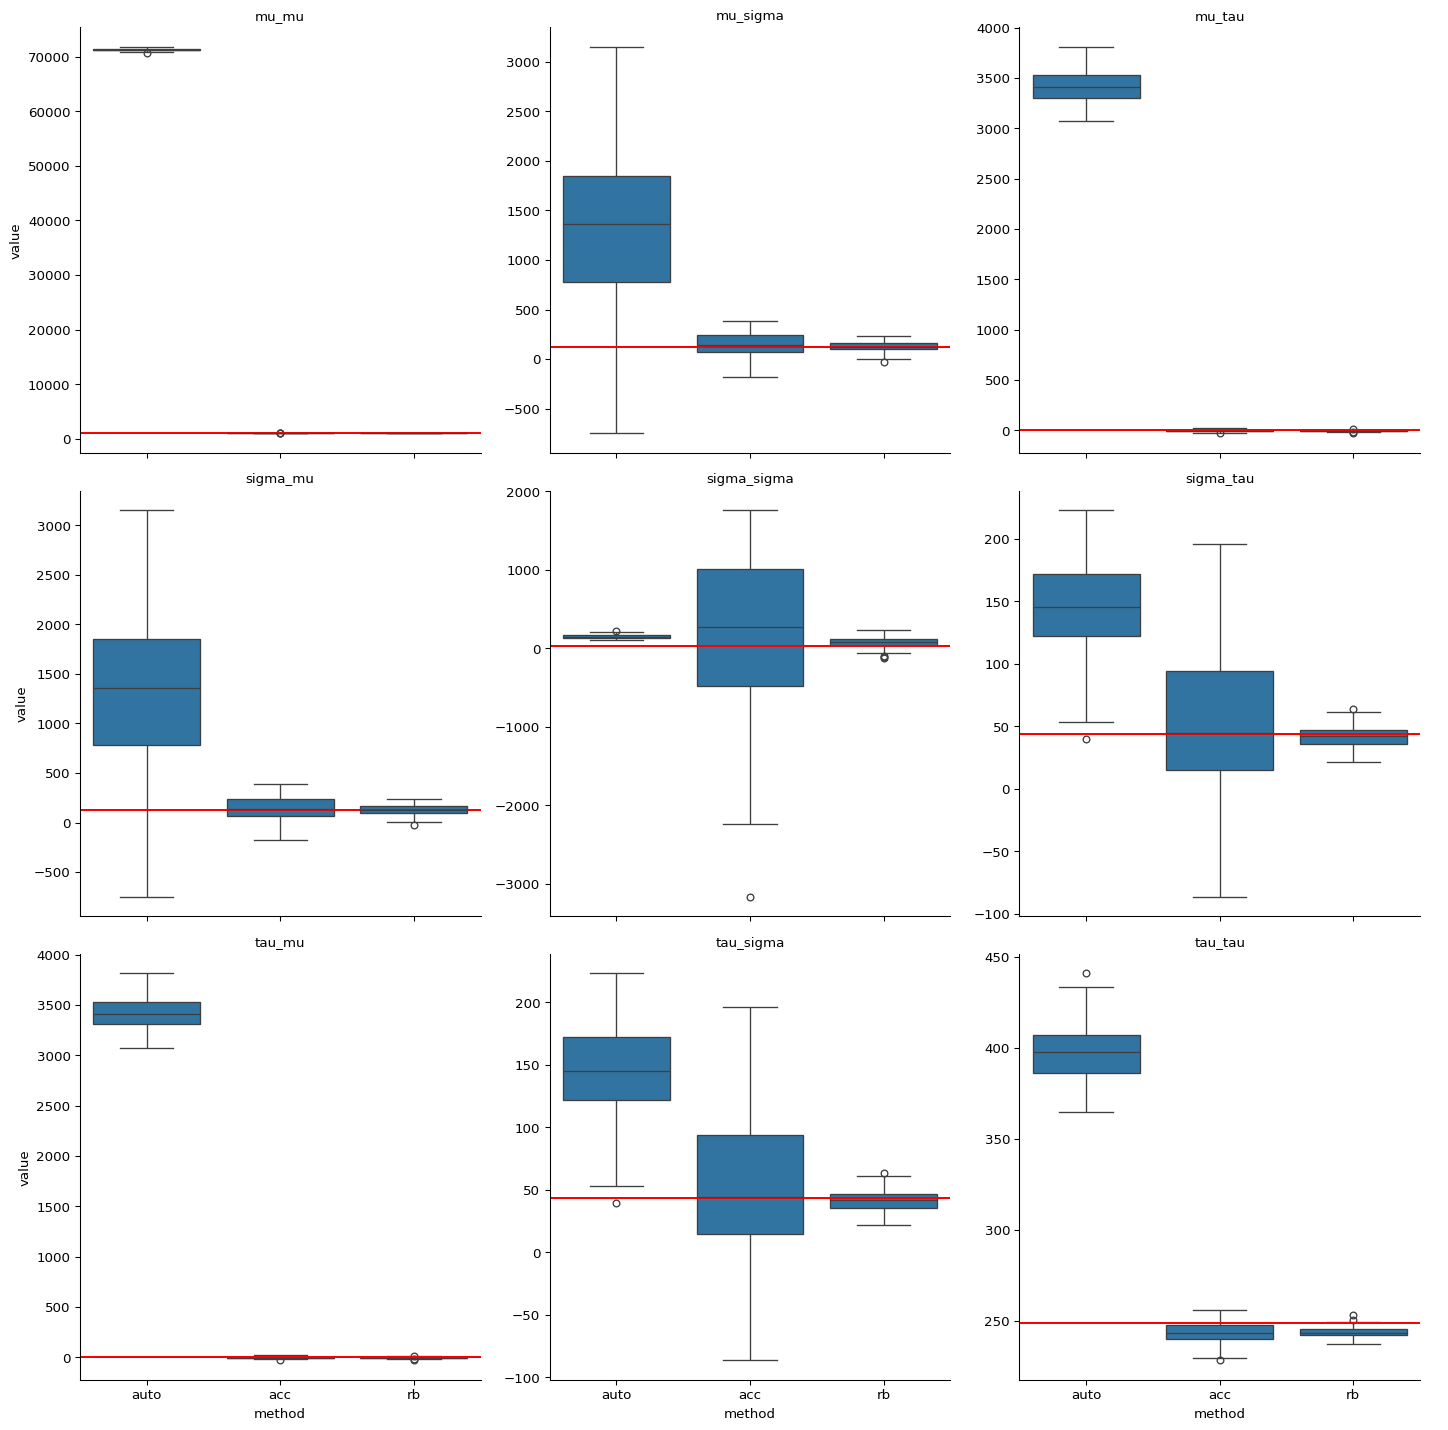

In [16]:
theta2_names = np.meshgrid(np.array(theta_names), np.array(theta_names))
theta2_names = np.array(
    [theta2_names[1].ravel()[i] + '_' +
     theta2_names[0].ravel()[i]
     for i in range(theta2_names[0].size)]
)

plot_df = (
    pd.DataFrame({
    "theta": np.tile(theta2_names, n_sim),
    "auto": np.array(fisher_auto).ravel(),
    "acc": np.array(fisher_acc).ravel(),
    "rb": np.array(fisher_rb).ravel()
})
    .melt(id_vars=["theta"], value_vars=["auto", "acc", "rb"], var_name="method")
)

g = sns.catplot(
    data=plot_df, kind="box",
    x="method", y="value",
    col="theta",
    col_wrap=3,
    sharey=False
)
g.set_titles(col_template="{col_name}")
[g.axes[i].axhline(fisher_exact.ravel()[i], color="red") for i in range(theta2_names.size)];

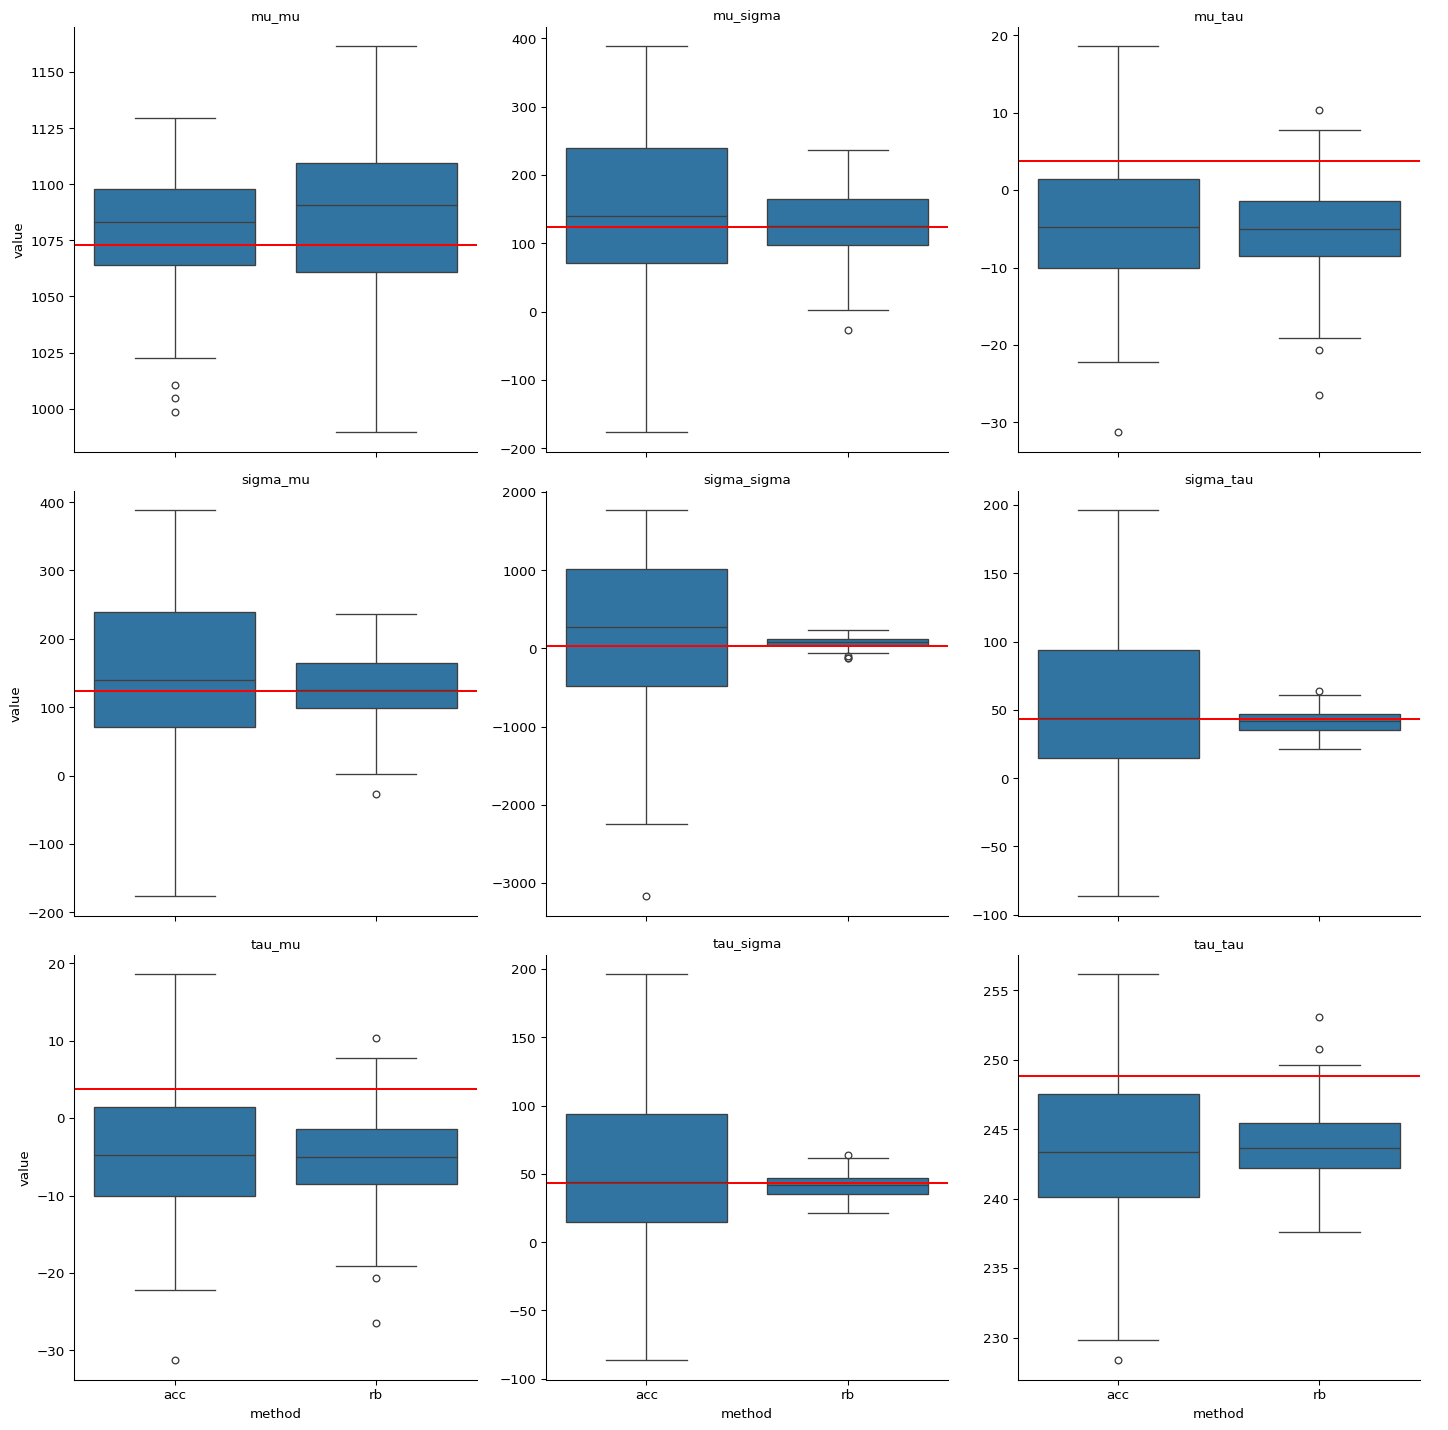

In [17]:
# same thing without auto
plot_df = (
    pd.DataFrame({
    "theta": np.tile(theta2_names, n_sim),
    "acc": np.array(fisher_acc).ravel(),
    "rb": np.array(fisher_rb).ravel()
})
    .melt(id_vars=["theta"], value_vars=["acc", "rb"], var_name="method")
)

g = sns.catplot(
    data=plot_df[plot_df["method"] != "auto"], kind="box",
    x="method", y="value",
    col="theta",
    col_wrap=3,
    sharey=False
)
g.set_titles(col_template="{col_name}")
[g.axes[i].axhline(fisher_exact.ravel()[i], color="red") for i in range(theta2_names.size)];